In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [101]:
# ===============================
# STEP 1: Load the dataset
# ===============================
df = pd.read_csv("../data/raw_data.csv")

print("\n🔹 STEP 1: Dataset Loaded")
print("Shape:", df.shape)
display(df.head(5))  # show first 5 rows


🔹 STEP 1: Dataset Loaded
Shape: (2000, 29)


,Company_ID,Industry_Type,Company_Size,Location_Region,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Technique,...,Methane_Emissions_tons_per_year,Water_Pollution_Index,Soil_Pollution_Index,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,CSR_Initiatives_on_Waste,Public_Sustainability_Reports,Perfect_Waste_Decomposition_System
0,C0640,Pharma,Medium,Rural,17332.66,42,48,10,67,Mixed,...,28.83,2,25,Yes,Yes,11,86,Yes,Yes,1
1,C1460,Textile,Medium,Rural,15774.52,20,40,40,70,Landfill,...,253.86,97,82,Yes,Yes,4,30,Yes,Yes,0
2,C1839,Food,Small,Rural,3487.97,45,35,20,57,Composting,...,226.16,99,56,No,Yes,4,17,No,No,0
3,C1646,Automobile,Small,Semi-Urban,520.20,12,51,37,70,Incineration,...,138.41,50,82,Yes,No,4,24,Yes,Yes,0
4,C0149,Food,Small,Rural,1861.76,62,37,1,83,Anaerobic Digestion,...,20.16,20,3,Yes,Yes,11,68,Yes,Yes,1


In [102]:
# ===============================
# STEP 2: Handle Missing Values
# ===============================
print("\n🔹 STEP 2: Checking Missing Values")
print(df.isnull().sum())


🔹 STEP 2: Checking Missing Values
Company_ID                               0
Industry_Type                            0
Company_Size                             0
Location_Region                          0
Total_Waste_Generated_kg_per_month       0
Biodegradable_Waste_%                    0
Recyclable_Waste_%                       0
Hazardous_Waste_%                        0
Waste_Segregation_Level_%                0
Decomposition_Technique                  0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Waste_to_Energy_Usage                    0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Govt_Compliance_Status                   0
Environmental_Fines_Count                0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Water_Pollution_Index                    0
Soil_Pollution_Index                     0
Employee_Training_i

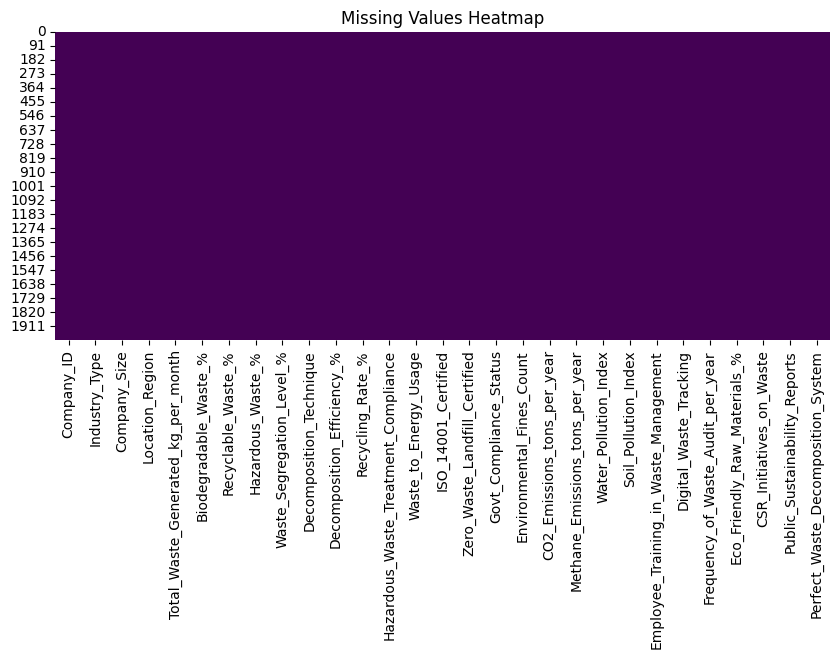

In [103]:
# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [104]:
# Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values handled")
print("Shape after filling NAs:", df.shape)

✅ Missing values handled
Shape after filling NAs: (2000, 29)


In [105]:
# ===============================
# STEP 3: Encode Categorical Columns
# ===============================
print("\n🔹 STEP 3: Encoding Categorical Columns")

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("✅ Categorical columns encoded")
print("Shape after encoding:", df.shape)


🔹 STEP 3: Encoding Categorical Columns
✅ Categorical columns encoded
Shape after encoding: (2000, 29)



🔹 STEP 4: Scaling Numerical Features
✅ Numerical features scaled
Shape after scaling: (2000, 29)


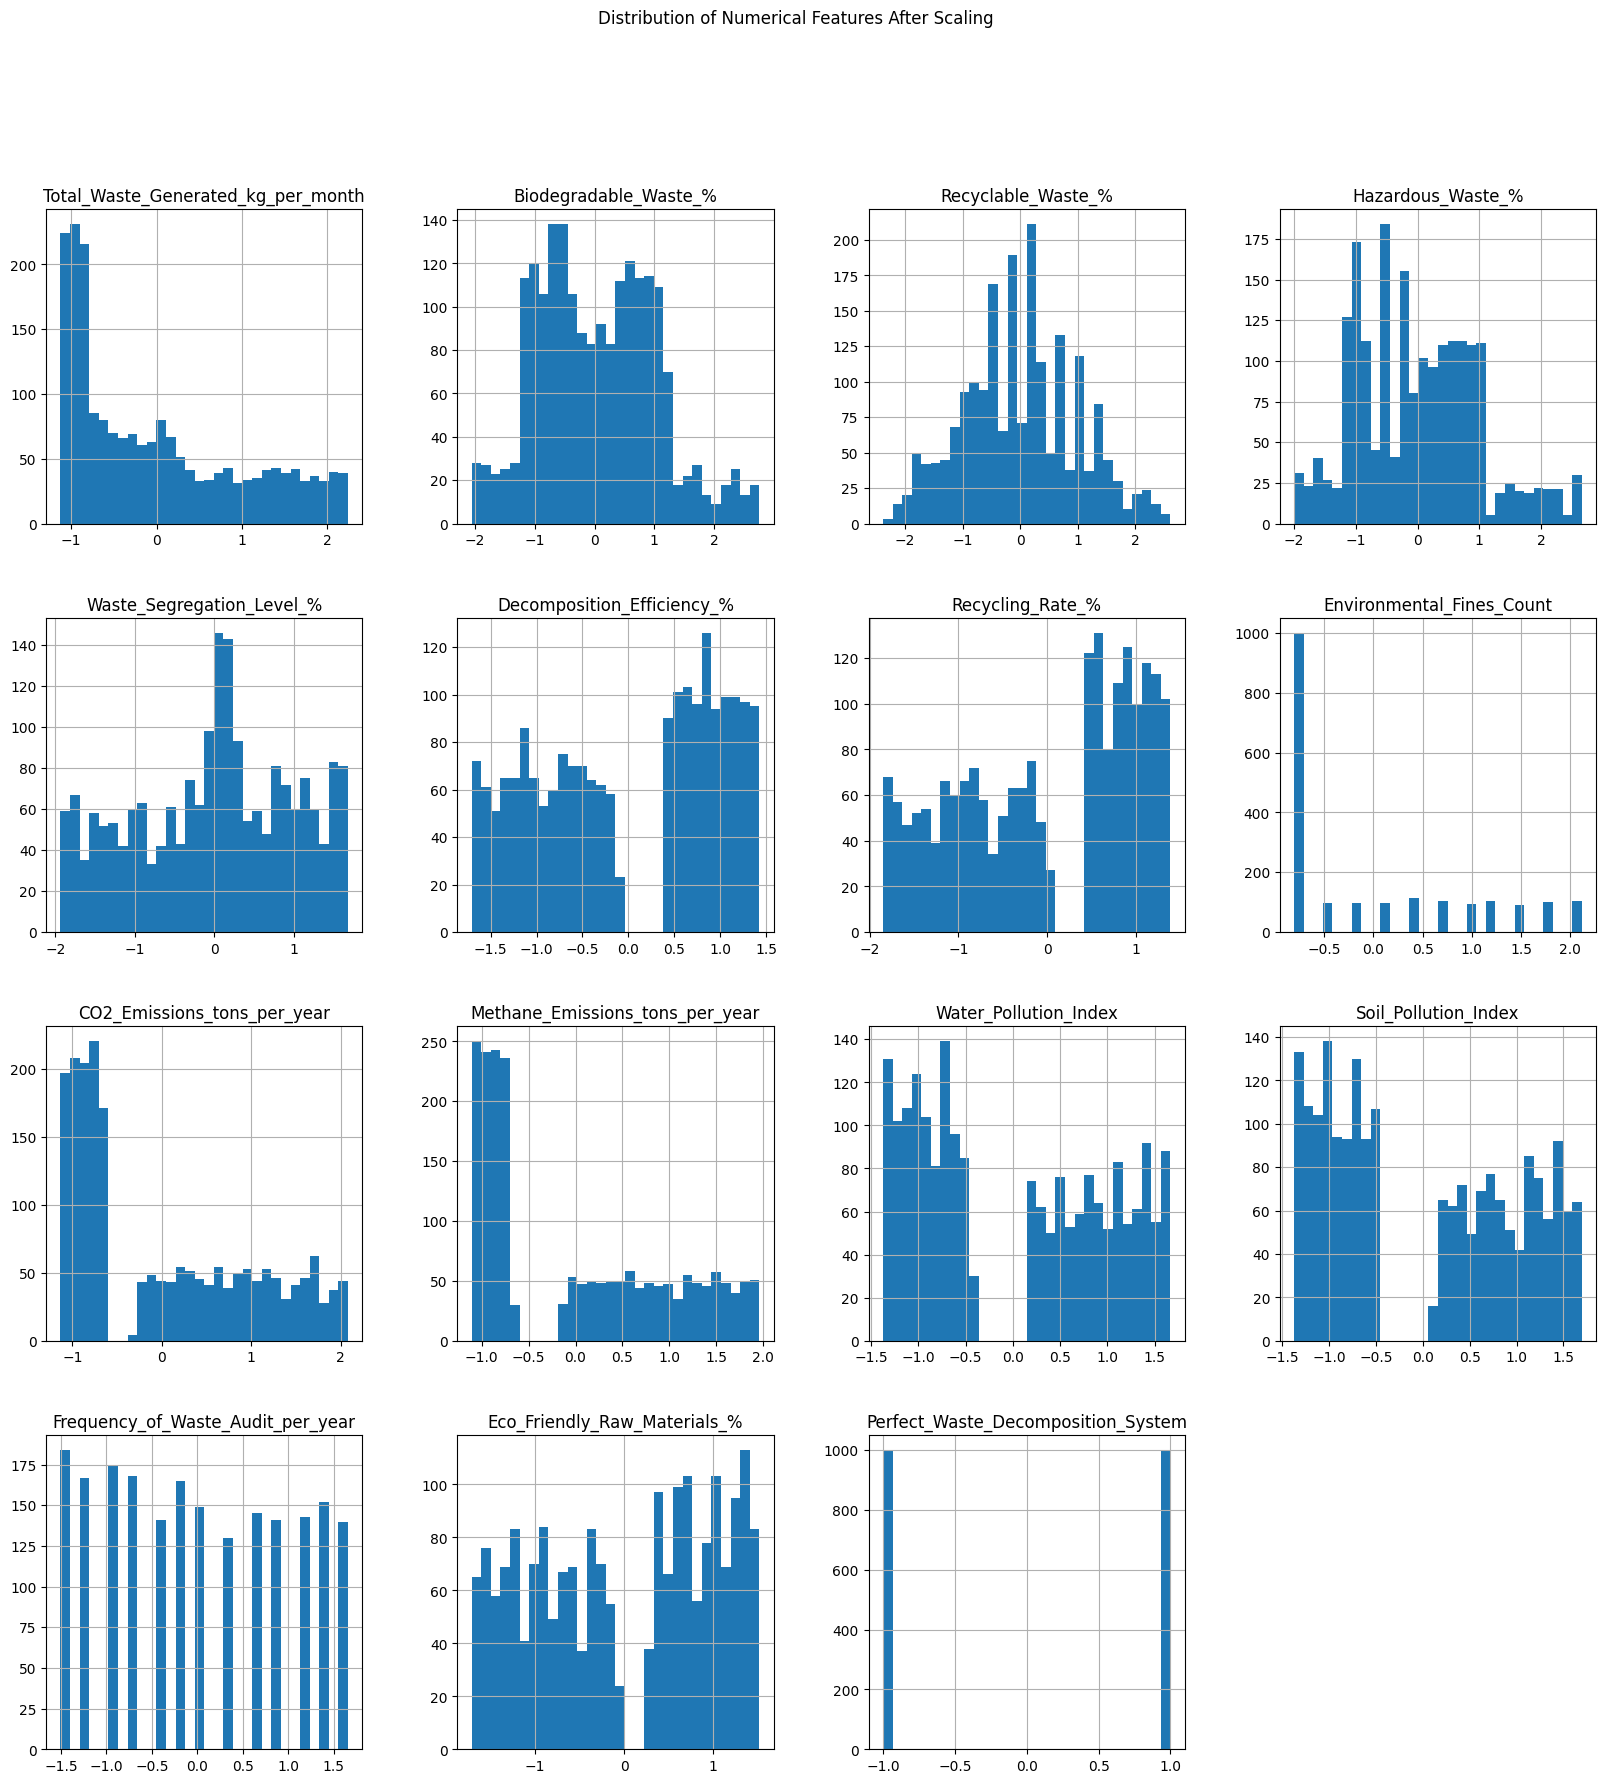

In [106]:
# ===============================
# STEP 4: Scale Numerical Features
# ===============================
print("\n🔹 STEP 4: Scaling Numerical Features")

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Numerical features scaled")
print("Shape after scaling:", df.shape)

# Show histogram after scaling
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribution of Numerical Features After Scaling")
plt.show()


🔹 STEP 5: Applying PCA for Dimensionality Reduction


,Company_ID,Industry_Type,Company_Size,Location_Region,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Technique,...,Methane_Emissions_tons_per_year,Water_Pollution_Index,Soil_Pollution_Index,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,CSR_Initiatives_on_Waste,Public_Sustainability_Reports,Perfect_Waste_Decomposition_System
0,639,5,1,0,0.020863,0.510931,0.779223,-1.222828,0.191415,4,...,-0.909252,-1.314137,-0.604192,1,1,1.393822,1.354685,1,1,1.0
1,1459,6,1,0,-0.085332,-1.252144,0.113505,1.107922,0.327186,3,...,1.472269,1.577354,1.142604,1,1,-0.451427,-0.905882,1,1,-1.0
2,1838,2,2,0,-0.922726,0.751350,-0.302569,-0.445911,-0.261156,1,...,1.179117,1.638227,0.345820,0,1,-0.451427,-1.430656,0,0,-1.0
3,1645,0,2,1,-1.124996,-1.893262,1.028868,0.874847,0.327186,2,...,0.250447,0.146827,1.142604,1,0,-0.451427,-1.148085,1,1,-1.0
4,148,2,2,0,-1.033561,2.113726,-0.136139,-1.922054,0.915528,0,...,-1.001008,-0.766275,-1.278394,1,1,1.393822,0.628074,1,1,1.0



Shape after dropping unnecessary columns: (2000, 28)

Original shape: (2000, 28)
Reduced shape: (2000, 18)

Shape after PCA: (2000, 19)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Perfect_Waste_Decomposition_System
0,3.695933,-0.059111,-1.761778,0.444269,-0.138005,-1.427403,0.325237,0.026342,0.000953,-0.149721,0.126226,0.082075,-0.001522,0.129360,-0.028362,-0.626100,0.412457,0.203506,1.0
1,-2.497383,0.050418,0.675436,0.827733,-0.879022,-1.059712,2.348139,0.118637,-2.065049,1.057352,-1.458140,0.878395,-0.247773,-0.115132,0.569158,0.442439,-1.447811,-0.155857,-1.0
2,-4.228421,1.620529,-0.389477,-0.688061,-1.186255,-0.460183,-0.582414,0.822618,1.172827,0.695120,1.546573,1.666201,1.795255,-0.678130,0.249434,0.908488,0.356160,0.032418,-1.0
3,-1.585915,1.625752,1.852451,1.983995,0.064306,0.138551,-1.156156,-1.088932,0.583376,0.088340,0.435575,0.073040,-1.520758,0.214315,1.547674,1.018351,-0.745587,1.190949,-1.0
4,3.733452,1.648066,-2.164228,-1.236885,-1.780459,-0.067148,-1.445329,0.152422,0.158205,0.264057,0.100268,-0.184180,-0.023722,-0.272107,0.038888,-0.060596,0.097292,0.260627,1.0


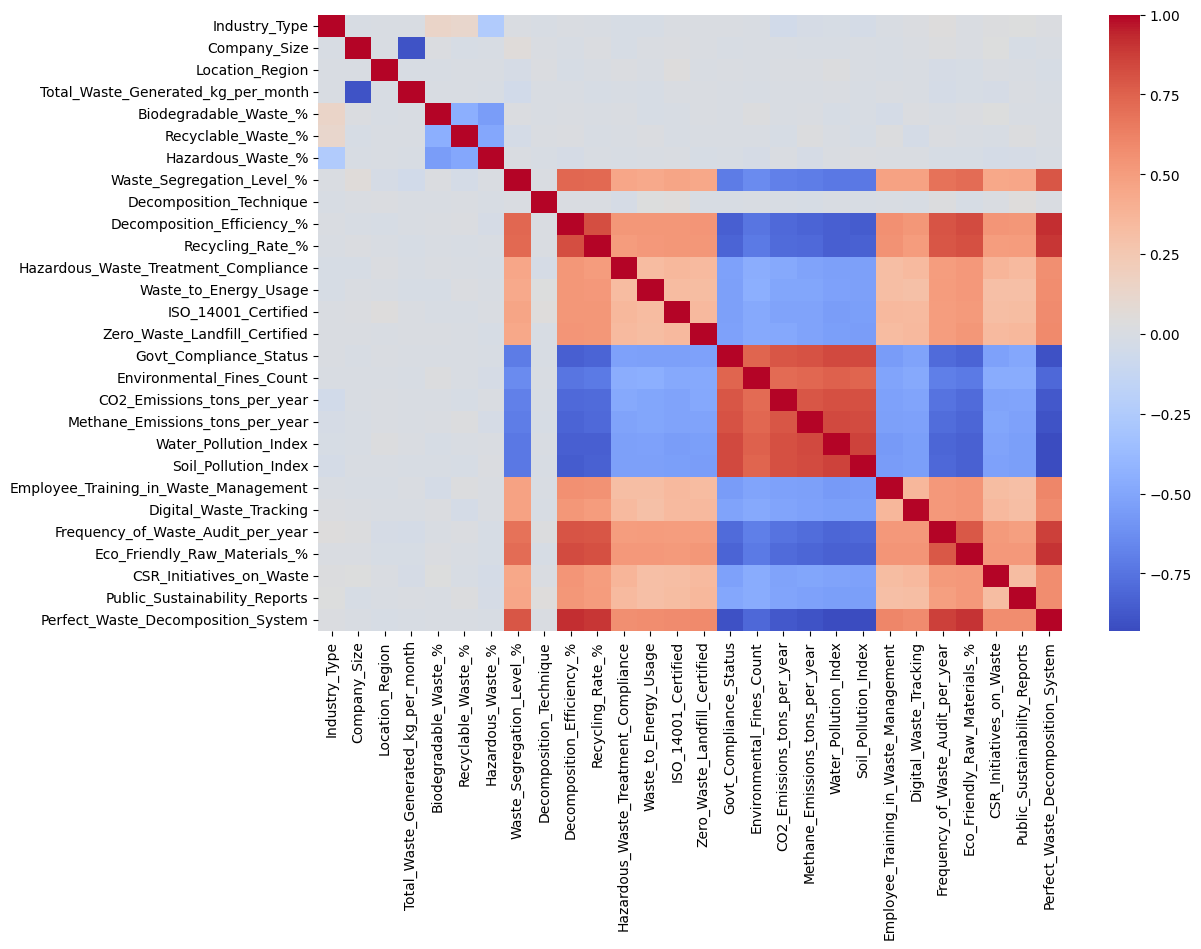

In [107]:
# ===============================
# STEP 5: Apply PCA for Redundancy Reduction
# ===============================
print("\n🔹 STEP 5: Applying PCA for Dimensionality Reduction")
display(df.head(5))  # show first 5 rows before PCA


df.drop(columns=['Company_ID'], inplace=True) 
print(f"\nShape after dropping unnecessary columns: {df.shape}\n")

# Correlation matrix 
corr = df.corr() # Heatmap to spot redundancy 
plt.figure(figsize=(12,8)) 
sns.heatmap(corr, annot=False, cmap="coolwarm")


target_col = "Perfect_Waste_Decomposition_System"
y = df[target_col]
x = df.drop(columns=[target_col])


from sklearn.decomposition import PCA
 # Select only numeric columns for PCA 
X_numeric = df.select_dtypes(include=['float64','int64']) 

# Scale before PCA (important!) 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_numeric) 
# Apply PCA 
pca = PCA(n_components=0.95) # keep 95% variance 
X_pca = pca.fit_transform(X_scaled) 
print("Original shape:", X_numeric.shape) 
print("Reduced shape:", X_pca.shape) 
import pandas as pd 
# Convert PCA output (NumPy array) back to DataFrame 
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) 
# Add target back to dataset 
final_df = pd.concat([X_pca_df, pd.Series(y, name="Perfect_Waste_Decomposition_System")], axis=1)

df = final_df
print("\nShape after PCA:", df.shape)
display(df.head(5))  # show first 5 rows after PCA

In [108]:
# ===============================
# STEP 6: Save Preprocessed Dataset
# ===============================
df.to_csv("../data/preprocessed_data.csv", index=False)
print("\n💾 Preprocessed dataset saved as 'preprocessed_data.csv'")


💾 Preprocessed dataset saved as 'preprocessed_data.csv'


In [109]:
# ===============================
# STEP 7: Train-Test Split
# ===============================
print("\n🔹 STEP 7: Splitting into Train/Test Sets")

# Assuming last column is target (adjust as per your dataset)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("✅ Data split complete")
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


🔹 STEP 7: Splitting into Train/Test Sets
✅ Data split complete
Train set shape: (1600, 18) (1600,)
Test set shape: (400, 18) (400,)
